In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

weather_df = pd.read_csv('testset.csv', parse_dates=['datetime_utc'], index_col='datetime_utc')
weather_df.head()



,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


Clean the data. Detect and remove outliers.

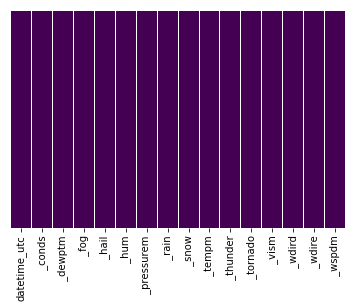

In [332]:
sns.heatmap(weather_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [326]:
del(weather_df[" _wgustm"])
del(weather_df[" _windchillm"])
del(weather_df[" _heatindexm"])
del(weather_df[" _precipm"])

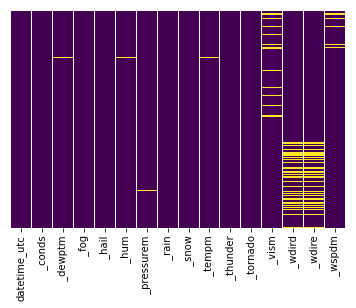

In [328]:
sns.heatmap(weather_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [329]:
weather_df[" _pressurem"].fillna(weather_df[" _pressurem"].mean,inplace=True)
weather_df[" _vism"].fillna(weather_df[" _vism"].mod,inplace=True)
weather_df[" _wdird"].fillna(weather_df[" _wdird"].mean,inplace=True)
weather_df[" _wspdm"].fillna(weather_df[" _wspdm"].mean,inplace=True)
weather_df[" _wdire"].fillna(weather_df[" _wdire"].mod,inplace=True)
weather_df[" _dewptm"].fillna(weather_df[" _dewptm"].mod,inplace=True)
weather_df[" _hum"].fillna(weather_df[" _hum"].mod,inplace=True)
weather_df[" _tempm"].fillna(weather_df[" _tempm"].mod,inplace=True)


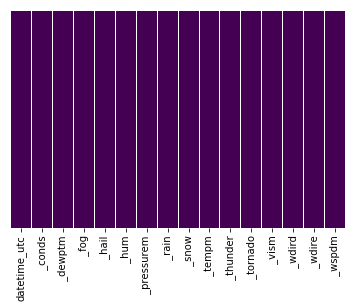

In [330]:
sns.heatmap(weather_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [333]:
weather_df

RecursionError: maximum recursion depth exceeded while calling a Python object

TypeError: cannot concatenate object of type "<class 'numpy.ndarray'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

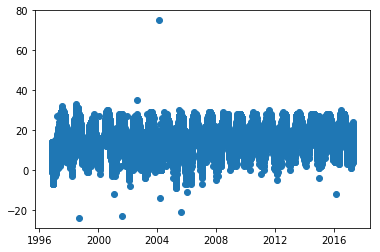

In [287]:
plt.scatter(weather_df.index,weather_df[" _dewptm"])


In [288]:

s=" _dewptm	 _fog	 _hail	 _hum	 _rain	 _snow	 _tempm	 _thunder	 _tornado"
col=s.split("	")
col

[' _dewptm',
 ' _fog',
 ' _hail',
 ' _hum',
 ' _rain',
 ' _snow',
 ' _tempm',
 ' _thunder',
 ' _tornado']

In [289]:
for x in col:  
#     (weather_df[' _dewptm'])
    weather_df[x] = weather_df[x][weather_df[x].between(weather_df[x].quantile(.025),weather_df[x].quantile(.975))]

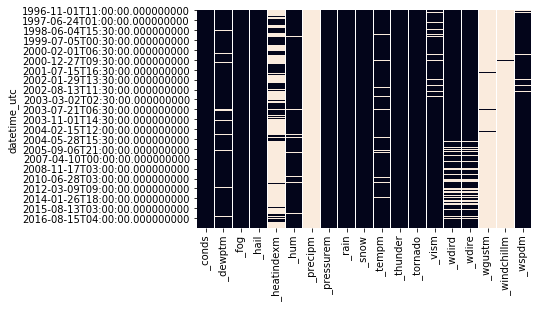

In [290]:
sns.heatmap(weather_df.isnull(), cbar=False)

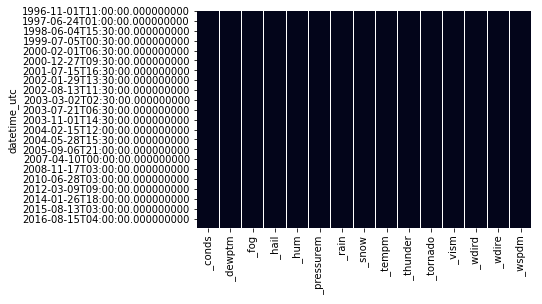

In [275]:
sns.heatmap(weather_df.isnull(), cbar=False)


In [313]:
weather_df

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0
5,1996-11-01 17:00:00,Smoke,12.0,0,0,NaN,56.0,NaN,1011.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
6,1996-11-01 18:00:00,Smoke,13.0,0,0,NaN,60.0,NaN,1010.0,0,0,21.0,0,0,0.8,0.0,North,NaN,NaN,0.0
7,1996-11-01 19:00:00,Smoke,13.0,0,0,NaN,60.0,NaN,-9999.0,0,0,21.0,0,0,NaN,0.0,North,NaN,NaN,NaN
8,1996-11-01 20:00:00,Smoke,13.0,0,0,NaN,68.0,NaN,-9999.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN
9,1996-11-01 21:00:00,Smoke,13.0,0,0,NaN,68.0,NaN,1010.0,0,0,19.0,0,0,NaN,0.0,North,NaN,NaN,NaN
